In [169]:
def get_order(n_samples):
    try:
        with open(str(n_samples) + '.txt') as fp:
            line = fp.readline()
            return list(map(int, line.split(',')))
    except FileNotFoundError:
        random.seed(1)
        indices = list(range(n_samples))
        random.shuffle(indices)
        return indices

In [ ]:
from string import punctuation, digits
import numpy as np
import random

def hinge_loss_single(feature_vector, label, theta, theta_0):
    """
    Finds the hinge loss on a single data point given specific classification
    parameters.

    Args:
        feature_vector - A numpy array describing the given data point.
        label - A real valued number, the correct classification of the data
            point.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given data point and parameters.
    """
    
    feature_vector_trans = np.array(np.transpose(feature_vector))
    t = np.matmul(feature_vector_trans, theta)
    z = label*(t+theta_0)
    
    if z >= 1:
        loss = 0
    else:
        loss = 1 - z
    return loss
    
    raise NotImplementedError

In [36]:
hinge_loss_single([1, 2], -1, [-1, 1], 2)

4

In [102]:
def hinge_loss_full(feature_matrix, labels, theta, theta_0):
    """
    Finds the total hinge loss on a set of data given specific classification
    parameters.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.


    Returns: A real number representing the hinge loss associated with the
    given dataset and parameters. This number should be the average hinge
    loss across all of the points in the feature matrix.
    """
    
    loss_sum = 0
    
    for i in range(len(np.array(feature_matrix))):
        loss_sum = loss_sum + hinge_loss_single(feature_matrix[i], labels[i], theta, theta_0)

    loss_avg = loss_sum/(i+1)
    
    
    return loss_avg


    raise NotImplementedError

In [103]:
hinge_loss_full([[1, 2], [1, 1]], [-1, 1], [-1, 1], 2)

2.0

In [240]:
def perceptron_single_step_update(
        feature_vector,
        label,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the perceptron algorithm.

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        current_theta - The current theta being used by the perceptron
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the perceptron
            algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    
    feature_vector_trans = np.array(np.transpose(feature_vector))
    t = np.matmul(feature_vector_trans, current_theta)
    z = label*(t + current_theta_0)
    
    if z < 0.0001:
        new_theta = np.sum([current_theta, label*feature_vector], axis=0)
        new_theta_0 = current_theta_0 + label
    else:
        new_theta = current_theta
        new_theta_0 = current_theta_0
    
    thethas = (new_theta, new_theta_0)
    
    return thethas
    
    raise NotImplementedError

In [244]:
perceptron_single_step_update([1, 2], 1, [-1, 1], -1.5)

(array([0, 3]), -0.5)

In [264]:
def perceptron(feature_matrix, labels, T):
    """
    Runs the full perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])

    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    theta, the linear classification parameter, after T iterations through the
    feature matrix and the second element is a real number with the value of
    theta_0, the offset classification parameter, after T iterations through
    the feature matrix.
    """
    thethas_1 = np.zeros(len(feature_matrix[0])) #initializing thethas_1+ to 0
    thetha_0 = 0 #initializing thethas to 0
    thethas = (thethas_1, thetha_0)
    
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            thethas = perceptron_single_step_update(feature_matrix[i], labels[i], thethas[0], thethas[1])
            pass
        
    return thethas
    
    raise NotImplementedError

In [265]:
perceptron(np.array([[1, 2]]), np.array([1]), 2)

(array([1., 2.]), 1)

In [266]:
feature_matrix = np.array([[0, 1, 2], [2,3,3]])
print(len(feature_matrix[0]))

for i in get_order(feature_matrix.shape[0]):
    print(feature_matrix[i])
    print(i)
    
thethas_1 = np.zeros(len(feature_matrix[0])) #initializing thethas to 0
print(thethas_1)
thetha_0 = 0 #initializing thethas to 0
thethas = (thethas_1, thetha_0)
print(thethas)
print(thethas[1])

3
[2 3 3]
1
[0 1 2]
0
[0. 0. 0.]
(array([0., 0., 0.]), 0)
0


In [281]:
def average_perceptron(feature_matrix, labels, T):
    """
    Runs the average perceptron algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    NOTE: Iterate the data matrix by the orders returned by get_order(feature_matrix.shape[0])


    Args:
        feature_matrix -  A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the perceptron algorithm
            should iterate through the feature matrix.

    Returns: A tuple where the first element is a numpy array with the value of
    the average theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the average theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.

    Hint: It is difficult to keep a running average; however, it is simple to
    find a sum and divide.
    """
    
    thethas_1 = np.zeros(len(feature_matrix[0])) #initializing thethas_1+ to 0
    thetha_0 = 0 #initializing thethas to 0
    thethas = (thethas_1, thetha_0)

    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):
            thethas = perceptron_single_step_update(feature_matrix[i], labels[i], thethas[0], thethas[1])
            thethas_1 = np.sum([thethas_1, thethas[0]], axis=0)
            thetha_0 = thetha_0 + thethas[1]
            pass
    
    thethas_final = (thethas_1/(T*feature_matrix.shape[0]), thetha_0/(T*feature_matrix.shape[0])) 
    return thethas_final
    
    raise NotImplementedError

In [283]:
average_perceptron(np.array([[1, 2],[-1,0]]), np.array([1, 1]), 2)

(array([-0.25,  1.5 ]), 1.75)

In [285]:
def pegasos_single_step_update(
        feature_vector,
        label,
        L,
        eta,
        current_theta,
        current_theta_0):
    """
    Properly updates the classification parameter, theta and theta_0, on a
    single step of the Pegasos algorithm

    Args:
        feature_vector - A numpy array describing a single data point.
        label - The correct classification of the feature vector.
        L - The lamba value being used to update the parameters.
        eta - Learning rate to update parameters.
        current_theta - The current theta being used by the Pegasos
            algorithm before this update.
        current_theta_0 - The current theta_0 being used by the
            Pegasos algorithm before this update.

    Returns: A tuple where the first element is a numpy array with the value of
    theta after the current update has completed and the second element is a
    real valued number with the value of theta_0 after the current updated has
    completed.
    """
    
    feature_vector_trans = np.array(np.transpose(feature_vector))
    t = np.matmul(feature_vector_trans, current_theta)
    z = label*(t + current_theta_0)
    
    if z <= 1:
        new_theta = np.sum([(1-L*eta)*current_theta, eta*label*feature_vector], axis=0)
        new_theta_0 = current_theta_0 + eta*label
    else:
        new_theta = (1-L*eta)*current_theta
        new_theta_0 = current_theta_0
    
    thethas = (new_theta, new_theta_0)
    
    return thethas
    
    
    
    raise NotImplementedError

In [ ]:
# https://towardsdatascience.com/perceptron-algorithms-for-linear-classification-e1bb3dcc7602

In [291]:
pegasos_single_step_update(
        np.array([1, 1]),
        1,
        0.2,
        0.1,
        np.array([-1,1]),
        1)

(array([-0.88,  1.08]), 1.1)

In [316]:
def pegasos(feature_matrix, labels, T, L):
    """
    Runs the Pegasos algorithm on a given set of data. Runs T
    iterations through the data set, there is no need to worry about
    stopping early.

    For each update, set learning rate = 1/sqrt(t),
    where t is a counter for the number of updates performed so far (between 1
    and nT inclusive).

    NOTE: Please use the previously implemented functions when applicable.
    Do not copy paste code from previous parts.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        labels - A numpy array where the kth element of the array is the
            correct classification of the kth row of the feature matrix.
        T - An integer indicating how many times the algorithm
            should iterate through the feature matrix.
        L - The lamba value being used to update the Pegasos
            algorithm parameters.

    Returns: A tuple where the first element is a numpy array with the value of
    the theta, the linear classification parameter, found after T
    iterations through the feature matrix and the second element is a real
    number with the value of the theta_0, the offset classification
    parameter, found after T iterations through the feature matrix.
    """
    
    thethas_1 = np.zeros(len(feature_matrix[0])) #initializing thethas_1+ to 0
    thetha_0 = 0 #initializing thethas to 0
    thethas = (thethas_1, thetha_0)
    counter = 1
    
    for t in range(T):
        for i in get_order(feature_matrix.shape[0]):            
            eta = 1/(counter)**0.5
            thethas = pegasos_single_step_update(feature_matrix[i], labels[i], L, eta, thethas[0], thethas[1])
            counter = counter + 1
            pass
    
    return thethas
    
    
    
    raise NotImplementedError

In [317]:
pegasos(np.array([[1, 2]]), np.array([1]), 1, 0.2)

(array([1., 2.]), 1.0)

In [318]:
import project1 as p1
import utils
import numpy as np

#-------------------------------------------------------------------------------
# Data loading. There is no need to edit code in this section.
#-------------------------------------------------------------------------------

train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

theta for Perceptron is 2.512799999999105, 4.125199999999998
theta_0 for Perceptron is -7.0


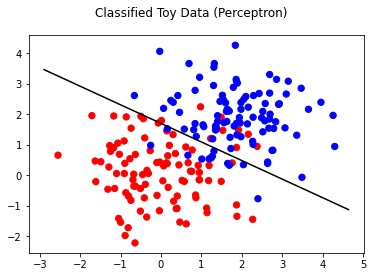

theta for Average Perceptron is 3.876074723499454, 3.9073112719998364
theta_0 for Average Perceptron is -7.081905


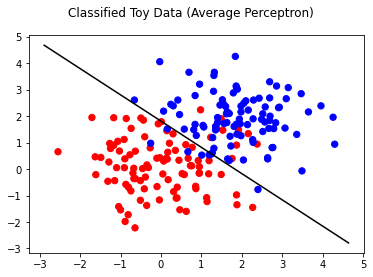

theta for Pegasos is 0.661395833715547, 0.5949551621199267
theta_0 for Pegasos is -1.2310716055759896


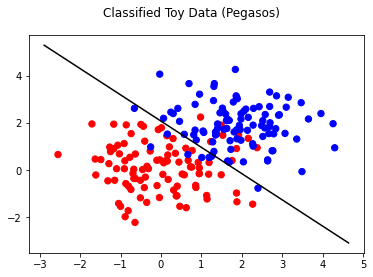

In [320]:
#-------------------------------------------------------------------------------
# Problem 5
#-------------------------------------------------------------------------------

toy_features, toy_labels = toy_data = utils.load_toy_data('toy_data.tsv')

T = 10 #to check if coverge change to 1,000 and 2,000
L = 0.2

thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str,list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

plot_toy_results('Perceptron', thetas_perceptron)
plot_toy_results('Average Perceptron', thetas_avg_perceptron)
plot_toy_results('Pegasos', thetas_pegasos)


In [332]:
def classify(feature_matrix, theta, theta_0):
    """
    A classification function that uses theta and theta_0 to classify a set of
    data points.

    Args:
        feature_matrix - A numpy matrix describing the given data. Each row
            represents a single data point.
        theta - A numpy array describing the linear classifier.
        theta_0 - A real valued number representing the offset parameter.

    Returns: A numpy array of 1s and -1s where the kth element of the array is
    the predicted classification of the kth row of the feature matrix using the
    given theta and theta_0. If a prediction is GREATER THAN zero, it should
    be considered a positive classification.
    """
    classif = np.zeros(feature_matrix.shape[0])
    
    for i in range(feature_matrix.shape[0]):
        feature_vector_trans = np.array(np.transpose(feature_matrix[i]))
        t = np.matmul(feature_vector_trans, theta)
        z = t + theta_0
    
        if z > 0.0001:
            classif[i] = 1
        else:
            classif[i] = -1
    
    return classif
    
    raise NotImplementedError

In [333]:
classify(np.array([[1, 1], [1, 1], [1, 1]]), np.array([1, 1]), 0)

array([1., 1., 1.])

In [330]:
x = np.array([[1, 1], [2, 3], [3, 4]])
classif = np.zeros(x.shape[0])
print(classif)
for i in range(x.shape[0]):
    print(i)
    print(x[i])

[0. 0. 0.]
0
[1 1]
1
[2 3]
2
[3 4]


In [334]:
def accuracy(preds, targets):
    """
    Given length-N vectors containing predicted and target labels,
    returns the percentage and number of correct predictions.
    """
    return (preds == targets).mean()

In [338]:
accuracy(np.array([1,1,-1]), np.array([1,1,-1]))

1.0

In [369]:
def classifier_accuracy(
        classifier,
        train_feature_matrix,
        val_feature_matrix,
        train_labels,
        val_labels,
        **kwargs):
    """
    Trains a linear classifier and computes accuracy.
    The classifier is trained on the train data. The classifier's
    accuracy on the train and validation data is then returned.

    Args:
        classifier - A classifier function that takes arguments
            (feature matrix, labels, **kwargs) and returns (theta, theta_0)
        train_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        val_feature_matrix - A numpy matrix describing the training
            data. Each row represents a single data point.
        train_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the training
            feature matrix.
        val_labels - A numpy array where the kth element of the array
            is the correct classification of the kth row of the validation
            feature matrix.
        **kwargs - Additional named arguments to pass to the classifier
            (e.g. T or L)

    Returns: A tuple in which the first element is the (scalar) accuracy of the
    trained classifier on the training data and the second element is the
    accuracy of the trained classifier on the validation data.
    """
    
    thethas = classifier(train_feature_matrix, train_labels, **kwargs)
    
    result_train = classify(train_feature_matrix, thethas[0], thethas[1])
    result_val = classify(val_feature_matrix, thethas[0], thethas[1])
    accuracy_train = accuracy(result_train, train_labels)
    accuracy_val = accuracy(result_val, val_labels)
    
    accuracy_out = (accuracy_train, accuracy_val)
    
    return accuracy_out

    
    raise NotImplementedError

In [354]:
classifier_accuracy(pegasos, 
                    np.array([[1, 0], [1, -1], [2, 3]]), 
                    np.array([[1, 1], [2, -1]]), 
                    np.array([1, -1, 1]), 
                    np.array([-1, 1]),
                    T=1,
                    L=0.2)

(1.0, 0.0)

In [361]:
#-------------------------------------------------------------------------------
# Problem 7
#-------------------------------------------------------------------------------

T = 10
L = 0.01

pct_train_accuracy, pct_val_accuracy = \
classifier_accuracy(perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

avg_pct_train_accuracy, avg_pct_val_accuracy = \
classifier_accuracy(average_perceptron, train_bow_features,val_bow_features,train_labels,val_labels,T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

avg_peg_train_accuracy, avg_peg_val_accuracy = \
classifier_accuracy(pegasos, train_bow_features,val_bow_features,train_labels,val_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for perceptron:   0.8157
Validation accuracy for perceptron: 0.7160
Training accuracy for average perceptron:   0.9728
Validation accuracy for average perceptron: 0.7980
Training accuracy for Pegasos:                     0.9143
Validation accuracy for Pegasos:                   0.7900


In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

import project1 as p1
import sys

if sys.version_info[0] < 3:
    PYTHON3 = False
else:
    PYTHON3 = True

def load_toy_data(path_toy_data):
    """
    Loads the 2D toy dataset as numpy arrays.
    Returns the tuple (features, labels) in which features is an Nx2 numpy matrix and
    labels is a length-N vector of +1/-1 labels.
    """
    labels, xs, ys = np.loadtxt(path_toy_data, delimiter='\t', unpack=True)
    return np.vstack((xs, ys)).T, labels

def load_data(path_data, extras=False):
    """
    Returns a list of dict with keys:
    * sentiment: +1 or -1 if the review was positive or negative, respectively
    * text: the text of the review

    Additionally, if the `extras` argument is True, each dict will also include the
    following information:
    * productId: a string that uniquely identifies each product
    * userId: a string that uniquely identifies each user
    * summary: the title of the review
    * helpfulY: the number of users who thought this review was helpful
    * helpfulN: the number of users who thought this review was NOT helpful
    """

    global PYTHON3

    basic_fields = {'sentiment', 'text'}
    numeric_fields = {'sentiment', 'helpfulY', 'helpfulN'}

    data = []
    if PYTHON3:
        f_data = open(path_data, encoding="latin1")
    else:
        f_data = open(path_data)

    for datum in csv.DictReader(f_data, delimiter='\t'):
        for field in list(datum.keys()):
            if not extras and field not in basic_fields:
                del datum[field]
            elif field in numeric_fields and datum[field]:
                datum[field] = int(datum[field])

        data.append(datum)

    f_data.close()

    return data

def write_predictions(path_submit_data, preds):
    if PYTHON3:
        f_data = open(path_submit_data, encoding="latin1")
    else:
        f_data = open(path_submit_data)

    reader = csv.DictReader(f_data, delimiter='\t')
    data = list(reader)

    assert len(preds) == len(data), \
           'Expected {} predictions but {} were given.'.format(len(data), len(preds))

    for pred, datum in zip(preds.astype(int), data):
        assert pred == 1 or pred == -1, 'Invalid prediction: {}.'.format(pred)
        datum['sentiment'] = pred
    f_data.close()

    if PYTHON3:
        f_out = open(path_submit_data, 'w')
    else:
        f_out = open(path_submit_data, 'wb')

    writer = csv.DictWriter(f_out, delimiter='\t', fieldnames=reader.fieldnames)
    writer.writeheader()
    for datum in data:
        writer.writerow(datum)
    f_out.close()

def plot_toy_data(algo_name, features, labels, thetas):
    """
    Plots the toy data in 2D.
    Arguments:
    * features - an Nx2 ndarray of features (points)
    * labels - a length-N vector of +1/-1 labels
    * thetas - the tuple (theta, theta_0) that is the output of the learning algorithm
    * algorithm - the string name of the learning algorithm used
    """
    # plot the points with labels represented as colors
    plt.subplots()
    colors = ['b' if label == 1 else 'r' for label in labels]
    plt.scatter(features[:, 0], features[:, 1], s=40, c=colors)
    xmin, xmax = plt.axis()[:2]

    # plot the decision boundary
    theta, theta_0 = thetas
    xs = np.linspace(xmin, xmax)
    ys = -(theta[0]*xs + theta_0) / (theta[1] + 1e-16)
    plt.plot(xs, ys, 'k-')

    # show the plot
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    plt.suptitle('Classified Toy Data ({})'.format(algo_name))
    plt.show()

def plot_tune_results(algo_name, param_name, param_vals, acc_train, acc_val):
    """
    Plots classification accuracy on the training and validation data versus
    several values of a hyperparameter used during training.
    """
    # put the data on the plot
    plt.subplots()
    plt.plot(param_vals, acc_train, '-o')
    plt.plot(param_vals, acc_val, '-o')

    # make the plot presentable
    algo_name = ' '.join((word.capitalize() for word in algo_name.split(' ')))
    param_name = param_name.capitalize()
    plt.suptitle('Classification Accuracy vs {} ({})'.format(param_name, algo_name))
    plt.legend(['train','val'], loc='upper right', title='Partition')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy (%)')
    plt.show()

def tune(train_fn, param_vals, train_feats, train_labels, val_feats, val_labels):
    train_accs = np.ndarray(len(param_vals))
    val_accs = np.ndarray(len(param_vals))

    for i, val in enumerate(param_vals):
        theta, theta_0 = train_fn(train_feats, train_labels, val)

        train_preds = classify(train_feats, theta, theta_0)
        train_accs[i] = accuracy(train_preds, train_labels)

        val_preds = classify(val_feats, theta, theta_0)
        val_accs[i] = accuracy(val_preds, val_labels)

    return train_accs, val_accs

def tune_perceptron(*args):
    return tune(perceptron, *args)

def tune_avg_perceptron(*args):
    return tune(average_perceptron, *args)

def tune_pegasos_T(best_L, *args):
    def train_fn(features, labels, T):
        return pegasos(features, labels, T, best_L)
    return tune(train_fn, *args)

def tune_pegasos_L(best_T, *args):
    def train_fn(features, labels, L):
        return pegasos(features, labels, best_T, L)
    return tune(train_fn, *args)

def most_explanatory_word(theta, wordlist):
    """Returns the word associated with the bag-of-words feature having largest weight."""
    return [word for (theta_i, word) in sorted(zip(theta, wordlist))[::-1]]


In [376]:
#-------------------------------------------------------------------------------
# Problem 8
#-------------------------------------------------------------------------------

data = (train_bow_features, train_labels, val_bow_features, val_labels)

# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

pct_tune_results = tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))



perceptron valid: [(1, 0.758), (5, 0.72), (10, 0.716), (15, 0.778), (25, 0.794), (50, 0.79)]
best = 0.7940, T=25.0000


In [377]:
avg_pct_tune_results = tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

avg perceptron valid: [(1, 0.794), (5, 0.792), (10, 0.798), (15, 0.798), (25, 0.8), (50, 0.796)]
best = 0.8000, T=25.0000


Pegasos valid: tune T [(1, 0.786), (5, 0.78), (10, 0.79), (15, 0.802), (25, 0.806), (50, 0.8)]
best = 0.8060, T=25.0000
Pegasos valid: tune L [(0.001, 0.786), (0.01, 0.806), (0.1, 0.762), (1, 0.568), (10, 0.518)]
best = 0.8060, L=0.0100


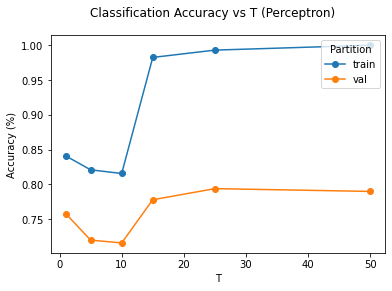

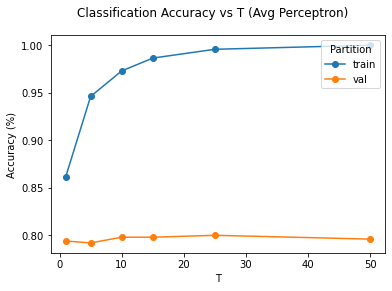

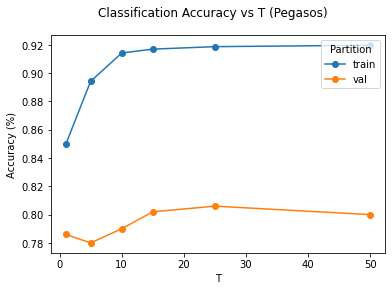

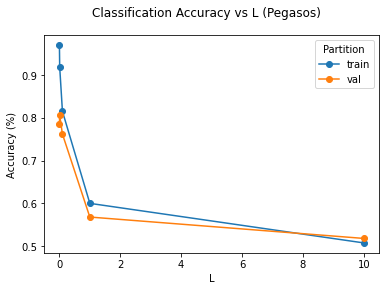

In [378]:
# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)


In [386]:
#-------------------------------------------------------------------------------
# Use the best method (perceptron, average perceptron or Pegasos) along with
# the optimal hyperparameters according to validation accuracies to test
# against the test dataset. The test data has been provided as
# test_bow_features and test_labels.
#-------------------------------------------------------------------------------

T = 25
L = 0.01


avg_peg_train_accuracy, avg_peg_val_accuracy = \
classifier_accuracy(pegasos, train_bow_features,test_bow_features,train_labels,test_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))



Training accuracy for Pegasos:                     0.9187
Validation accuracy for Pegasos:                   0.8020
(array([0., 0., 0.]), 0)


In [388]:
thethas = pegasos(train_bow_features, train_labels, T, L)

In [389]:
#-------------------------------------------------------------------------------
# Assign to best_theta, the weights (and not the bias!) learned by your most
# accurate algorithm with the optimal choice of hyperparameters.
#-------------------------------------------------------------------------------

best_theta = thethas[0] # Your code here
wordlist   = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Most Explanatory Word Features
['delicious', 'great', '!', 'best', 'perfect', 'loves', 'wonderful', 'glad', 'love', 'quickly']


In [436]:
def extract_words(input_string):
    """
    Helper function for bag_of_words()
    Inputs a text string
    Returns a list of lowercase words in the string.
    Punctuation and digits are separated out into their own words.
    """
    for c in punctuation + digits:
        input_string = input_string.replace(c, ' ' + c + ' ')

    return input_string.lower().split()
#pragma: coderesponse end

In [437]:
def bag_of_words(texts):
    """
    Inputs a list of string reviews
    Returns a dictionary of unique unigrams occurring over the input

    Feel free to change this code as guided by Problem 9
    """
    stopwords = open('stopwords.txt').read().splitlines()
    stop_dict = {}
    for s_word in stopwords:
        if s_word not in stop_dict:
            stop_dict[s_word] = len(stop_dict)
            
    dictionary = {} # maps word to unique index
    for text in texts:
        word_list = extract_words(text)
        for word in word_list:
            if word not in dictionary:
                if word not in stop_dict:
                    dictionary[word] = len(dictionary)
    return dictionary

In [424]:
    stopwords = open('stopwords.txt').read().splitlines()
    stop_dict = {}
    for s_word in stopwords:
        if s_word not in stop_dict:
            stop_dict[s_word] = len(stop_dict)
    print(stop_dict)

{'i': 0, 'me': 1, 'my': 2, 'myself': 3, 'we': 4, 'our': 5, 'ours': 6, 'ourselves': 7, 'you': 8, 'your': 9, 'yours': 10, 'yourself': 11, 'yourselves': 12, 'he': 13, 'him': 14, 'his': 15, 'himself': 16, 'she': 17, 'her': 18, 'hers': 19, 'herself': 20, 'it': 21, 'its': 22, 'itself': 23, 'they': 24, 'them': 25, 'their': 26, 'theirs': 27, 'themselves': 28, 'what': 29, 'which': 30, 'who': 31, 'whom': 32, 'this': 33, 'that': 34, 'these': 35, 'those': 36, 'am': 37, 'is': 38, 'are': 39, 'was': 40, 'were': 41, 'be': 42, 'been': 43, 'being': 44, 'have': 45, 'has': 46, 'had': 47, 'having': 48, 'do': 49, 'does': 50, 'did': 51, 'doing': 52, 'a': 53, 'an': 54, 'the': 55, 'and': 56, 'but': 57, 'if': 58, 'or': 59, 'because': 60, 'as': 61, 'until': 62, 'while': 63, 'of': 64, 'at': 65, 'by': 66, 'for': 67, 'with': 68, 'about': 69, 'against': 70, 'between': 71, 'into': 72, 'through': 73, 'during': 74, 'before': 75, 'after': 76, 'above': 77, 'below': 78, 'to': 79, 'from': 80, 'up': 81, 'down': 82, 'in': 83

In [441]:
#pragma: coderesponse template
def extract_bow_feature_vectors(reviews, dictionary):
    """
    Inputs a list of string reviews
    Inputs the dictionary of words as given by bag_of_words
    Returns the bag-of-words feature matrix representation of the data.
    The returned matrix is of shape (n, m), where n is the number of reviews
    and m the total number of entries in the dictionary.

    Feel free to change this code as guided by Problem 9
    """
    # Your code here

    num_reviews = len(reviews)
    feature_matrix = np.zeros([num_reviews, len(dictionary)])

    for i, text in enumerate(reviews):
        word_list = extract_words(text)
        for word in word_list:
            if word in dictionary:
                feature_matrix[i, dictionary[word]] += 1
    return feature_matrix
#pragma: coderesponse end

In [442]:
train_data = utils.load_data('reviews_train.tsv')
val_data = utils.load_data('reviews_val.tsv')
test_data = utils.load_data('reviews_test.tsv')

train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

dictionary = bag_of_words(train_texts)

train_bow_features = extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = extract_bow_feature_vectors(test_texts, dictionary)

In [443]:
dictionary = bag_of_words(train_texts)
print(len(dictionary))

13108


In [444]:
T = 25
L = 0.01


avg_peg_train_accuracy, avg_peg_val_accuracy = \
classifier_accuracy(pegasos, train_bow_features,test_bow_features,train_labels,test_labels,T=T,L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for Pegasos:                     0.8928
Validation accuracy for Pegasos:                   0.7700
